In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

In [2]:
# Initialize the COCO api for instance annotations
coco=COCO('/Users/saptarshimallikthakur/Desktop/VOC/instances_train2017.json')

loading annotations into memory...
Done (t=4.50s)
creating index...
index created!


In [3]:
import json

# Load JSON from a file
with open('/Users/saptarshimallikthakur/Desktop/VOC/instances_train2017.json', 'r') as file:
    data = json.load(file)

In [4]:
image_ids = coco.getImgIds()
image_id = image_ids[1] 
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))
catIDs = coco.getCatIds()

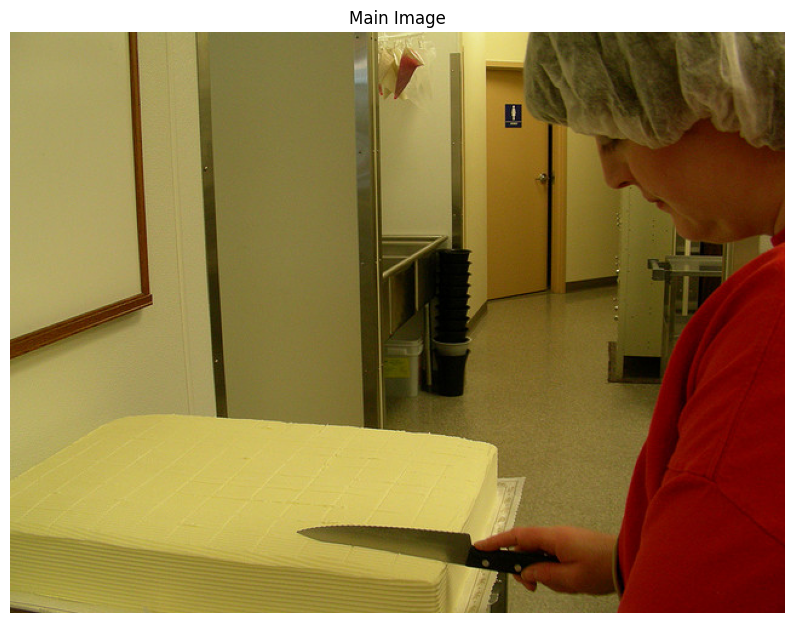

In [5]:
# Retrieve image file path
image_info = coco.loadImgs(image_id)[0]
image_dir = '/Users/saptarshimallikthakur/Desktop/VOC/train2017'
image_path = os.path.join(image_dir, image_info['file_name'])

# Load the main image
main_image = plt.imread(image_path)

# Create a new figure for displaying the main image
plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')
# Show the plots
plt.show()

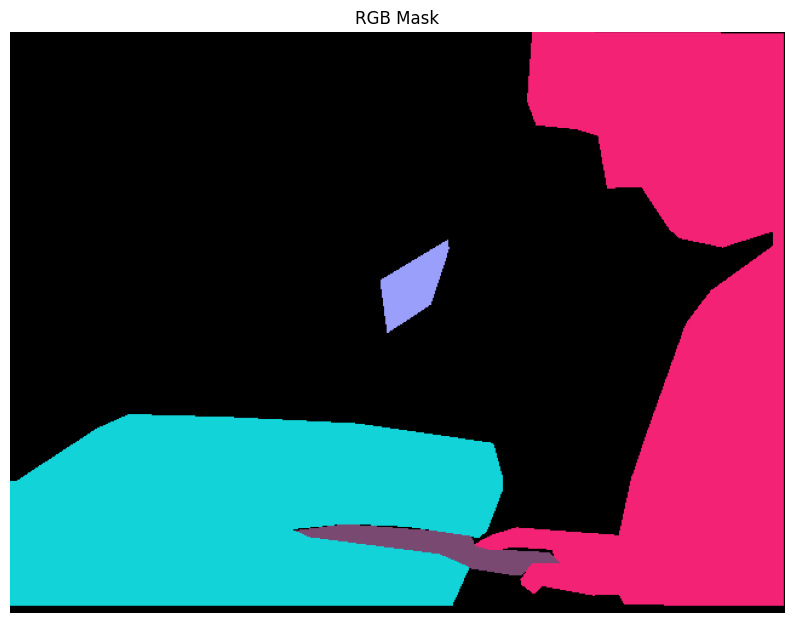

In [6]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty RGB mask with the same dimensions as the image
rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

# Define a color map for different object classes
color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

# Iterate through the annotations and assign unique colors to each class/object
for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    # Draw the mask on the RGB mask
    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

# Display the RGB mask
plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
plt.show()


In [7]:
color_map

{1: (244, 34, 117),
 2: (124, 57, 96),
 3: (79, 202, 50),
 4: (47, 233, 106),
 5: (249, 69, 70),
 6: (67, 86, 226),
 7: (7, 207, 120),
 8: (136, 50, 147),
 9: (3, 68, 29),
 10: (255, 55, 84),
 11: (14, 115, 18),
 13: (246, 171, 67),
 14: (140, 63, 0),
 15: (54, 71, 222),
 16: (191, 115, 100),
 17: (234, 57, 131),
 18: (95, 95, 25),
 19: (92, 242, 169),
 20: (15, 29, 20),
 21: (236, 113, 89),
 22: (36, 151, 29),
 23: (20, 187, 140),
 24: (19, 193, 70),
 25: (40, 184, 199),
 27: (143, 42, 172),
 28: (5, 8, 30),
 31: (223, 82, 26),
 32: (137, 112, 60),
 33: (219, 60, 217),
 34: (47, 138, 45),
 35: (77, 76, 246),
 36: (134, 151, 192),
 37: (40, 202, 28),
 38: (209, 199, 29),
 39: (108, 92, 80),
 40: (137, 56, 224),
 41: (246, 246, 2),
 42: (75, 42, 217),
 43: (174, 152, 179),
 44: (3, 163, 236),
 46: (90, 114, 54),
 47: (231, 239, 84),
 48: (255, 98, 119),
 49: (121, 73, 114),
 50: (40, 45, 160),
 51: (243, 109, 204),
 52: (50, 59, 124),
 53: (245, 227, 90),
 54: (37, 23, 88),
 55: (192, 4

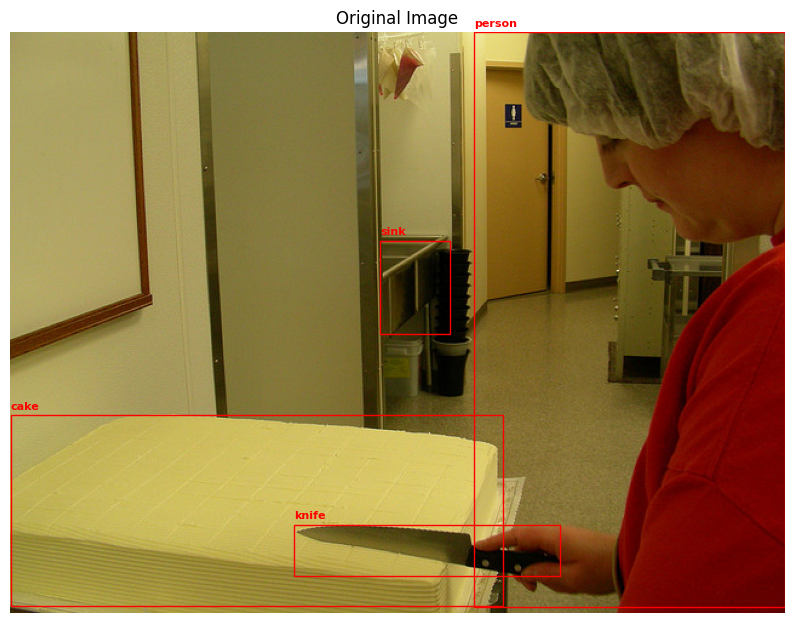

In [8]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create a new figure with the same dimensions as the image
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

# Display the original image
ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

# Draw bounding boxes on the original image
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    # Convert COCO bounding box format (x, y, width, height) to matplotlib format (xmin, ymin, xmax, ymax)
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    # Draw the bounding box rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add the category name as a label above the bounding box
    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

# Show the plot
plt.show()

In [9]:
import numpy as np
from pycocotools.coco import COCO
import os
import cv2  # You can use imageio or PIL as alternatives

# Input paths
coco_annotation_path = '/Users/saptarshimallikthakur/Desktop/VOC/instances_train2017.json'
output_dir = '/Users/saptarshimallikthakur/Desktop/VOC/segmentation 25000'

# Initialize COCO
coco = COCO(coco_annotation_path)
image_ids = coco.getImgIds()
catIDs = coco.getCatIds()

for image_id in image_ids[:25000]:
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))
    image_info = coco.loadImgs(image_id)[0]
    height, width = image_info['height'], image_info['width']
    file_name = image_info['file_name']
    file_base = os.path.splitext(file_name)[0]

    # Initialize single-channel mask with zeros
    class_mask = np.zeros((height, width), dtype=np.uint8)

    for annotation in annotations:
        category_id = annotation['category_id']
        mask = coco.annToMask(annotation)
        
        # Fill in the class ID where mask==1
        class_mask[mask == 1] = category_id

    # Optional: Expand dims to (H, W, 1) if required
    class_mask = np.expand_dims(class_mask, axis=-1)

    # Save the mask
    out_path = os.path.join(output_dir, f"{file_base}_mask.png")
    cv2.imwrite(out_path, class_mask)  # cv2 will save it as a grayscale PNG

loading annotations into memory...
Done (t=4.35s)
creating index...
index created!


In [10]:
import os
import pandas as pd

# Paths
image_dir = '/Users/saptarshimallikthakur/Desktop/VOC/train2017'
mask_dir = '/Users/saptarshimallikthakur/Desktop/VOC/segmentation 25000'

# Get all image filenames
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Prepare list of image and label paths
data = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    file_base = os.path.splitext(img_file)[0]
    label_file = f"{file_base}_mask.png"
    label_path = os.path.join(mask_dir, label_file)

    # Optional: check if mask exists
    if os.path.exists(label_path):
        data.append({'img_path': img_path, 'label_path': label_path})

# Create DataFrame
df = pd.DataFrame(data)
df

,img_path,label_path
0,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
1,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
2,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
3,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
4,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
...,...,...
24995,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
24996,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
24997,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...
24998,/Users/saptarshimallikthakur/Desktop/VOC/train...,/Users/saptarshimallikthakur/Desktop/VOC/segme...


In [12]:
df['img_path'][23000],df['label_path'][23000]

('/Users/saptarshimallikthakur/Desktop/VOC/train2017/000000535536.jpg',
 '/Users/saptarshimallikthakur/Desktop/VOC/segmentation 25000/000000535536_mask.png')

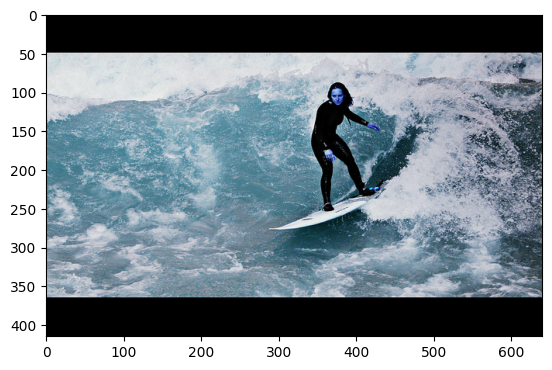

In [19]:
plt.imshow(cv2.imread(df['img_path'][23000]))

In [29]:
def mask_to_rgb(mask, cmap=color_map):
    """mask: (H,W) int32 ➜ (H,W,3) uint8"""
    h, w = mask.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in cmap.items():
        rgb[mask == cls_id] = color
    return rgb

mask = cv2.imread(df['label_path'][23000],cv2.IMREAD_UNCHANGED)
mask = mask_to_rgb(mask)

In [33]:
import tensorflow as tf
mask = tf.io.read_file(df['label_path'][23000])
mask = tf.image.decode_png(mask, channels=1)
mask = tf.cast(mask, tf.uint8)

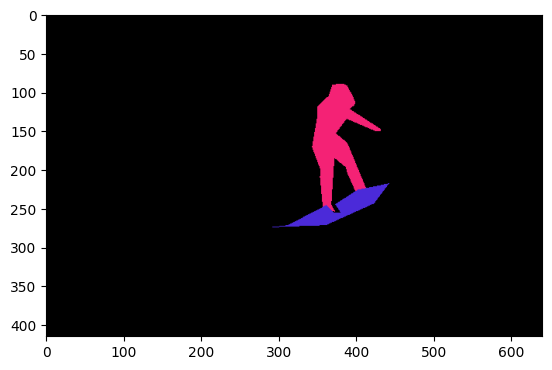

In [40]:
plt.imshow(mask_to_rgb(mask[:,:,0]))